# **LSTM MultiEntrada Clasificador - Empresa Southern Copper**
#### **Curso:** Inteligencia de Negocios
#### **Docente:**  Mg. Ernesto D. Cancho Rodríguez
#### **Equipo:** D
#### **Integrantes:**
*   Hurtado Santos, Estiven Salvador - 20200135
*   López Terrones, Ximena Xiomy - 20200020
*   Llactahuaman Muguerza, Anthony Joel - 20200091
*   Mondragón Zúñiga, Rubén Alberto - 20200082
*   Morales Robladillo, Nicole Maria - 20200136
*   Aquije Vásquez, Carlos Adrian - 19200319
*   Cespedes Flores, Sebastian - 1820025

### Importamos Librerías

In [11]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [12]:
#Importamos la librería nueva
import yfinance as yf

In [13]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'

### Carga de datos SCCO

### Inputs para Predicción

#### Mercado de Commodities

##### Datos de GLD (ORO)

##### Datos de SLV (Plata)

##### Datos de COPX (Cobre)

#### Índicies

##### Datos de GSPC (Índice SP500)


##### Datos de IXIC (Índice NASDAQ)

##### Datos de DJI (Índice Dow Jones)

#### Mercado de divisas y Criptomonedas

##### Datos de PEN

##### Datos ETH

##### Datos BZ

##### Datos BTC

### Transformaciones

### Data del BCRP

#### Tasas de Interés

**Realizamos Transformaciones**

### Indicadores Bursátiles

**Realizamos Transformaciones**

#### Indicadores de Riesgo

#### Indice Precios Consumidor

#### Fred - Tasa Efectiva

### Combinamos la data

**Instalamos dependencias extras necesarias**

**Importamos librerías descargadas**

#### Limpieza de Datos

In [14]:
def obtenerData(instrumentoFinanciero, fechaInicio, fechaFin):
    IF_df = yf.download(instrumentoFinanciero,
                        start=fechaInicio, end=fechaFin)
    IF_df.columns += "_" + instrumentoFinanciero
    GLD_data = yf.download('GLD', start=fechaInicio, end=fechaFin)
    GLD_data.columns += "_GLD"
    SLV_data = yf.download('SLV', start=fechaInicio, end=fechaFin)
    SLV_data.columns += "_SLV"
    COPX_data = yf.download('COPX', start=fechaInicio, end=fechaFin)
    COPX_data.columns += "_COPX"
    GSPC_data = yf.download('^GSPC', start=fechaInicio, end=fechaFin)
    GSPC_data.columns += "_GSPC"
    IXIC_data = yf.download('^IXIC', start=fechaInicio, end=fechaFin)
    IXIC_data.columns += "_IXIC"
    DJI_data = yf.download('^DJI', start=fechaInicio, end=fechaFin)
    DJI_data.columns += "_DJI"
    PEN_X_data = yf.download('PEN=X', start=fechaInicio, end=fechaFin)
    PEN_X_data.columns += "_PEN_X"
    BZ_F_data = yf.download('BZ=F', start=fechaInicio, end=fechaFin)
    BZ_F_data.columns += "_BZ_F"
    df = pd.merge(IF_df, GLD_data, on='Date')
    df = pd.merge(df, SLV_data, on='Date')
    df = pd.merge(df, COPX_data, on='Date')
    df = pd.merge(df, GSPC_data, on='Date')
    df = pd.merge(df, IXIC_data, on='Date')
    df = pd.merge(df, DJI_data, on='Date')
    df = pd.merge(df, PEN_X_data, on='Date')
    df = pd.merge(df, BZ_F_data, on='Date')
    df = df.drop(['Volume_PEN_X'], axis=1)
    return df


In [15]:
fechaInicio = '2018-01-01'
fechaFin = '2022-12-31'
df = obtenerData('BVN', fechaInicio, fechaFin)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
df['BVN_Return'] = df['Close_BVN'].pct_change()
df['BVN_Return'] = df['BVN_Return'].shift(-1)
df['BVN_Return'] = df['BVN_Return'].fillna(0)
df

,Open_BVN,High_BVN,Low_BVN,Close_BVN,Adj Close_BVN,Volume_BVN,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BVN_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.16,14.54,13.99,14.52,14.124078,1643300,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,0.006887
2018-01-03,14.53,14.89,14.35,14.62,14.221352,1606700,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.027360
2018-01-04,14.66,15.12,14.56,15.02,14.610445,1845400,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.011984
2018-01-05,14.95,15.15,14.81,14.84,14.435353,1037400,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.033019
2018-01-08,14.83,14.84,14.28,14.35,13.958715,1286100,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.011150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,7.55,7.59,7.36,7.44,7.371337,447000,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.029570
2022-12-27,7.51,7.85,7.44,7.66,7.589307,624400,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.019582
2022-12-28,7.61,7.64,7.34,7.51,7.440692,911700,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.003995


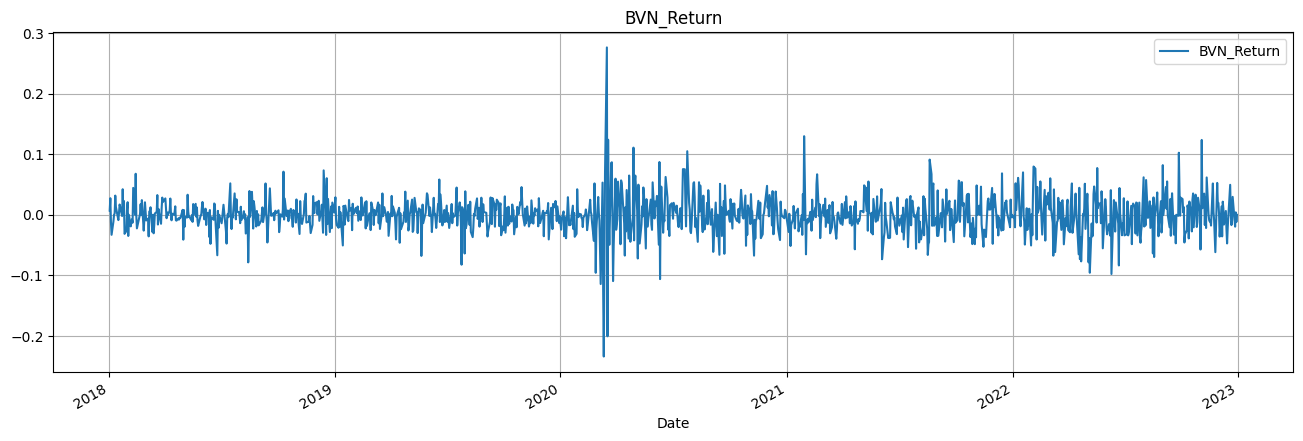

In [19]:
plt.figure(figsize=(16, 5))
plt.title("BVN_Return")
df.BVN_Return.plot()
plt.grid(True);
plt.legend()
plt.show()

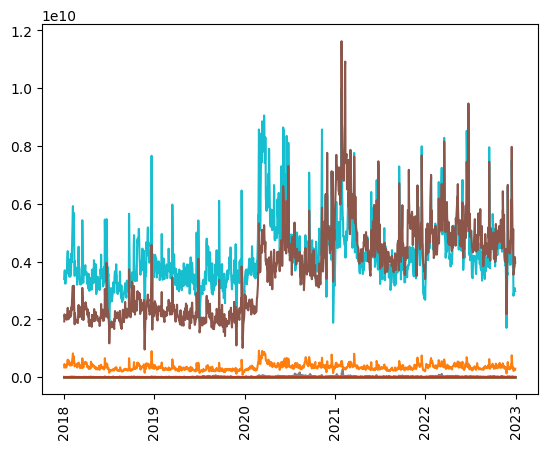

In [20]:
plt.plot(df);
plt.xticks(rotation='vertical');

### Procesamiento - Paso 1



In [21]:
df02 = df.copy()

In [22]:
df02.sample(10)

,Open_BVN,High_BVN,Low_BVN,Close_BVN,Adj Close_BVN,Volume_BVN,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BVN_Return
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-02,12.000000,12.230000,11.880000,12.000000,11.808816,578600,178.690002,179.289993,178.160004,178.539993,...,3.538284,3.6070,3.6070,40.790001,40.820000,38.790001,39.270000,39.270000,37290,0.025833
2018-02-06,15.110000,15.190000,14.810000,14.910000,14.503444,1530800,126.540001,126.550003,125.220001,125.379997,...,3.170000,3.2300,3.2300,66.989998,67.589996,66.550003,66.860001,66.860001,32169,-0.012072
2022-01-26,8.390000,8.580000,8.000000,8.200000,8.069359,1092100,171.389999,171.729996,169.479996,169.789993,...,3.645000,3.8450,3.8450,88.019997,90.480003,87.800003,89.959999,89.959999,29805,-0.004878
2019-03-06,16.629999,16.670000,16.330000,16.370001,16.021578,859700,121.430000,121.639999,121.260002,121.610001,...,3.242300,3.3100,3.3100,65.629997,66.169998,65.230003,65.989998,65.989998,41210,0.007941
2022-04-19,10.900000,10.900000,10.330000,10.330000,10.165422,1041800,183.190002,183.649994,181.330002,181.820007,...,3.662880,3.7310,3.7310,112.650002,114.050003,106.769997,107.250000,107.250000,18972,0.044530
2019-07-03,16.799999,16.870001,16.379999,16.530001,16.237110,315600,133.610001,134.100006,133.229996,133.630005,...,3.223200,3.2232,3.2232,62.750000,64.000000,62.070000,63.820000,63.820000,35881,0.003025
2018-04-10,16.030001,16.209999,15.960000,16.040001,15.602633,1463100,127.019997,127.309998,126.669998,127.120003,...,3.160000,3.1595,3.1595,68.559998,71.320000,68.480003,71.040001,71.040001,45123,0.026808
2019-06-28,16.500000,16.690001,16.139999,16.670000,16.374628,867200,133.050003,133.339996,132.610001,133.199997,...,3.237700,3.2922,3.2922,66.650002,66.779999,66.059998,66.550003,66.550003,1810,-0.011998
2021-02-25,11.630000,11.670000,11.220000,11.230000,11.051085,1417300,166.919998,167.660004,165.449997,165.820007,...,3.578931,3.6430,3.6430,67.339996,67.699997,66.489998,66.879997,66.879997,11746,-0.015138


### Tratamiento de Missing Values

In [23]:
df03 = df02.dropna()  # Eliminar filas con valores nulos

In [24]:
df03

,Open_BVN,High_BVN,Low_BVN,Close_BVN,Adj Close_BVN,Volume_BVN,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BVN_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.16,14.54,13.99,14.52,14.124078,1643300,124.660004,125.180000,124.389999,125.150002,...,3.164500,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,0.006887
2018-01-03,14.53,14.89,14.35,14.62,14.221352,1606700,125.050003,125.089996,124.099998,124.820000,...,3.171200,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.027360
2018-01-04,14.66,15.12,14.56,15.02,14.610445,1845400,124.889999,125.849998,124.739998,125.459999,...,3.166700,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.011984
2018-01-05,14.95,15.15,14.81,14.84,14.435353,1037400,124.930000,125.480003,124.830002,125.330002,...,3.148000,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.033019
2018-01-08,14.83,14.84,14.28,14.35,13.958715,1286100,125.199997,125.320000,124.900002,125.309998,...,3.146200,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.011150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,7.55,7.59,7.36,7.44,7.371337,447000,166.880005,167.800003,166.660004,167.259995,...,3.729958,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.029570
2022-12-27,7.51,7.85,7.44,7.66,7.589307,624400,167.889999,170.610001,167.800003,168.669998,...,3.717184,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.019582
2022-12-28,7.61,7.64,7.34,7.51,7.440692,911700,168.050003,168.339996,167.100006,167.910004,...,3.740191,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.003995


### Particionamiento en Entrenamiento y Test

In [25]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df03) * 0.8)
train_data = df03[:train_size]
test_data = df03[train_size-100:]

In [26]:
print(df03.shape)
print(train_size)
print(train_data.shape)
print(test_data.shape)

(1254, 54)
1003
(1003, 54)
(351, 54)


### Normalizamos la data en Escala de 0 y 1

In [27]:
df03.head()

,Open_BVN,High_BVN,Low_BVN,Close_BVN,Adj Close_BVN,Volume_BVN,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Low_PEN_X,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BVN_Return
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,14.16,14.54,13.99,14.52,14.124078,1643300,124.660004,125.180000,124.389999,125.150002,...,3.1645,3.1650,3.1650,66.419998,67.279999,66.230003,66.570000,66.570000,24294,0.006887
2018-01-03,14.53,14.89,14.35,14.62,14.221352,1606700,125.050003,125.089996,124.099998,124.820000,...,3.1712,3.1719,3.1719,66.489998,68.010002,66.400002,67.839996,67.839996,25878,0.027360
2018-01-04,14.66,15.12,14.56,15.02,14.610445,1845400,124.889999,125.849998,124.739998,125.459999,...,3.1667,3.1655,3.1655,68.000000,68.260002,67.529999,68.070000,68.070000,22840,-0.011984
2018-01-05,14.95,15.15,14.81,14.84,14.435353,1037400,124.930000,125.480003,124.830002,125.330002,...,3.1480,3.1503,3.1503,68.059998,68.089996,67.269997,67.620003,67.620003,18290,-0.033019
2018-01-08,14.83,14.84,14.28,14.35,13.958715,1286100,125.199997,125.320000,124.900002,125.309998,...,3.1462,3.2090,3.2090,67.820000,67.980003,67.449997,67.779999,67.779999,17704,-0.011150


In [28]:
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

In [29]:
scaled_train_data = scaler.fit_transform(train_data.drop(['BVN_Return'], axis=1))

In [30]:
scaled_train_data.shape

(1003, 53)

In [31]:
scaled_test_data = scaler.transform(test_data.drop(['BVN_Return'], axis=1))

In [32]:
print(type(scaled_train_data))
print(len(scaled_train_data))
print(scaled_train_data.shape)
scaled_train_data

<class 'numpy.ndarray'>
1003
(1003, 53)


array([[0.72435894, 0.70577775, 0.71705739, ..., 0.70433873, 0.70433873,
        0.27706508],
       [0.75400637, 0.7368889 , 0.74616011, ..., 0.72327412, 0.72327412,
        0.29527324],
       [0.76442304, 0.7573333 , 0.76313667, ..., 0.72670342, 0.72670342,
        0.26035129],
       ...,
       [0.16586539, 0.06222225, 0.15844786, ..., 0.89309679, 0.89309679,
        0.07892498],
       [0.16506409, 0.07022222, 0.16653193, ..., 0.89443862, 0.89443862,
        0.00327609],
       [0.18349358, 0.07466668, 0.17299922, ..., 0.89264941, 0.89264941,
        0.24770674]])

In [33]:
# Crear secuencias de tiempo para el modelo LSTM
window_size = 100

def create_sequences(data):
    x = []
    y = []
    for i in range( window_size , len(data) ):

        x.append( data[i-window_size:i] )
        y.append( data[i][-1] )


    return np.array(x), np.array(y)

In [34]:
x_train, y_train = create_sequences(scaled_train_data)

In [35]:
x_train.shape

(903, 100, 53)

In [36]:
y_train.shape

(903,)

In [37]:
x_test, y_test = create_sequences(scaled_test_data)

In [38]:
x_test.shape

(251, 100, 53)

In [39]:
y_test.shape

(251,)

In [40]:
x_train.shape[1]

100

In [41]:
x_train.shape[2]

53

### Modelo LSTM

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=160, return_sequences=True,
               input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(units=160))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 160)          136960    
                                                                 
 lstm_1 (LSTM)               (None, 160)               205440    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 342561 (1.31 MB)
Trainable params: 342561 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Compilar el modelo
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [44]:
# Entrenar el modelo
model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/100
15/15 [==============================] - 5s 220ms/step - loss: 0.6630 - accuracy: 0.0011 - val_loss: 0.5894 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 3s 191ms/step - loss: 0.6556 - accuracy: 0.0011 - val_loss: 0.5918 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 3s 200ms/step - loss: 0.6552 - accuracy: 0.0011 - val_loss: 0.6249 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 3s 197ms/step - loss: 0.6550 - accuracy: 0.0011 - val_loss: 0.5984 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 3s 202ms/step - loss: 0.6552 - accuracy: 0.0011 - val_loss: 0.5883 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 3s 202ms/step - loss: 0.6541 - accuracy: 0.0011 - val_loss: 0.5928 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 3s 200ms/step - loss: 0.6555 - accuracy: 0.0011 - val_loss: 0.606

15/15 [==============================] - 3s 207ms/step - loss: 0.6331 - accuracy: 0.0022 - val_loss: 0.6359 - val_accuracy: 0.0000e+00
Epoch 57/100
15/15 [==============================] - 3s 210ms/step - loss: 0.6296 - accuracy: 0.0022 - val_loss: 0.6126 - val_accuracy: 0.0000e+00
Epoch 58/100
15/15 [==============================] - 3s 208ms/step - loss: 0.6302 - accuracy: 0.0022 - val_loss: 0.6250 - val_accuracy: 0.0000e+00
Epoch 59/100
15/15 [==============================] - 3s 207ms/step - loss: 0.6311 - accuracy: 0.0022 - val_loss: 0.6125 - val_accuracy: 0.0000e+00
Epoch 60/100
15/15 [==============================] - 3s 203ms/step - loss: 0.6298 - accuracy: 0.0022 - val_loss: 0.6357 - val_accuracy: 0.0000e+00
Epoch 61/100
15/15 [==============================] - 3s 207ms/step - loss: 0.6292 - accuracy: 0.0022 - val_loss: 0.6337 - val_accuracy: 0.0000e+00
Epoch 62/100
15/15 [==============================] - 3s 209ms/step - loss: 0.6300 - accuracy: 0.0022 - val_loss: 0.6379 - va

In [45]:
# Evaluar el modelo en el conjunto de ENTRENAMIENTO
loss_train, accuracy_train = model.evaluate(x_train, y_train)
print('Loss:', loss_train)
print('Accuracy:', accuracy_train)

29/29 [==============================] - 1s 24ms/step - loss: 0.6146 - accuracy: 0.0022
Loss: 0.6146470308303833
Accuracy: 0.0022148394491523504


In [46]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

8/8 [==============================] - 0s 25ms/step - loss: 0.6577 - accuracy: 0.0000e+00
Loss: 0.6577275395393372
Accuracy: 0.0


In [47]:
# Predecir la tendencia para el periodo de TRAINING, evaluar el aprendizaje
train_predict = model.predict(x_train)
train_predict

29/29 [==============================] - 1s 25ms/step


array([[0.21545385],
       [0.11893298],
       [0.1006568 ],
       [0.41784972],
       [0.39414608],
       [0.38180587],
       [0.35964477],
       [0.34199643],
       [0.3503682 ],
       [0.31641293],
       [0.3140044 ],
       [0.3090528 ],
       [0.32283643],
       [0.3168721 ],
       [0.36540467],
       [0.37111592],
       [0.38188857],
       [0.36900562],
       [0.4973365 ],
       [0.5153884 ],
       [0.36235523],
       [0.22117428],
       [0.07950364],
       [0.07788345],
       [0.36073446],
       [0.27871287],
       [0.27173266],
       [0.23063944],
       [0.2398341 ],
       [0.29206282],
       [0.32203138],
       [0.35727146],
       [0.32823154],
       [0.2875661 ],
       [0.2734965 ],
       [0.2867431 ],
       [0.2841645 ],
       [0.32064962],
       [0.2630652 ],
       [0.26221398],
       [0.18668939],
       [0.1862801 ],
       [0.20254526],
       [0.13906905],
       [0.10297956],
       [0.12661022],
       [0.2888214 ],
       [0.276

In [48]:
# Predecir la tendencia para el periodo de TEST, incluido el día siguiente
test_predict = model.predict(x_test)


8/8 [==============================] - 0s 23ms/step


In [49]:
test_predict.shape

(251, 1)

In [50]:
train  = df03[:train_size]
valid  = df03[train_size:]
valid['Predictions'] = test_predict

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20816\1475914596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


In [51]:
valid

,Open_BVN,High_BVN,Low_BVN,Close_BVN,Adj Close_BVN,Volume_BVN,Open_GLD,High_GLD,Low_GLD,Close_GLD,...,Close_PEN_X,Adj Close_PEN_X,Open_BZ_F,High_BZ_F,Low_BZ_F,Close_BZ_F,Adj Close_BZ_F,Volume_BZ_F,BVN_Return,Predictions
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,7.16,7.40,7.09,7.32,7.203379,350200,168.860001,169.009995,168.000000,168.330002,...,3.9870,3.9870,77.940002,79.279999,77.040001,78.980003,78.980003,27224,-0.005464,0.368655
2022-01-04,7.34,7.54,7.25,7.28,7.164016,494200,168.899994,169.720001,168.729996,169.570007,...,3.9625,3.9625,78.949997,80.550003,78.599998,80.000000,80.000000,31321,-0.001374,0.405163
2022-01-05,7.33,7.63,7.23,7.27,7.154175,1041600,170.619995,170.929993,168.899994,169.059998,...,3.9550,3.9550,80.080002,81.489998,79.550003,80.800003,80.800003,35152,-0.020633,0.444316
2022-01-06,7.11,7.22,7.03,7.12,7.006565,830000,167.160004,167.750000,166.860001,166.990005,...,3.9590,3.9590,80.150002,82.839996,79.629997,81.989998,81.989998,41582,0.051966,0.463829
2022-01-07,7.28,7.55,7.19,7.49,7.370670,1601100,167.369995,168.009995,166.860001,167.750000,...,3.9650,3.9650,82.059998,82.989998,81.440002,81.750000,81.750000,29501,0.008011,0.455262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,7.55,7.59,7.36,7.44,7.371337,447000,166.880005,167.800003,166.660004,167.259995,...,3.8000,3.8000,81.730003,84.370003,81.339996,83.919998,83.919998,8621,0.029570,0.267533
2022-12-27,7.51,7.85,7.44,7.66,7.589307,624400,167.889999,170.610001,167.800003,168.669998,...,3.8175,3.8175,84.459999,85.669998,83.660004,84.330002,84.330002,7512,-0.019582,0.143895
2022-12-28,7.61,7.64,7.34,7.51,7.440692,911700,168.050003,168.339996,167.100006,167.910004,...,3.8080,3.8080,84.599998,84.639999,81.949997,83.260002,83.260002,5384,0.003995,0.121175


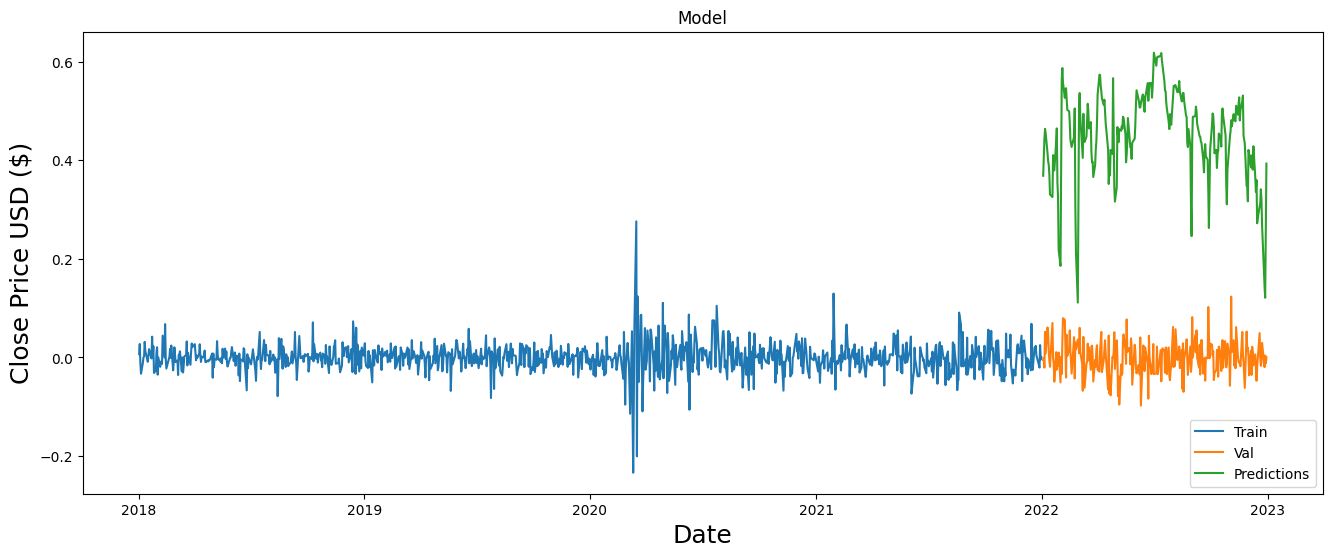

In [52]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['BVN_Return'])
plt.plot(valid[['BVN_Return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [53]:
model.save("BVN_LSTM.keras")